In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read data

data = pd.read_csv("All_India_Index_August2016.csv")
data.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [3]:
# CPI index

cpi_index = data.columns.values.tolist()
cpi_index.remove("Year")
cpi_index.remove("Month")
cpi_index.remove("Sector")
cpi_index.remove("Housing")

In [4]:
rural = data[cpi_index].ix[data.Sector == "Rural"]
urban = data[cpi_index].ix[data.Sector == "Urban"]
rural_urban = data[cpi_index].ix[data.Sector == "Rural+Urban"]

In [5]:
rural_return = np.log(rural / rural.shift(1)).ix[1:]
urban_return = np.log(urban / urban.shift(1)).ix[1:]
rural_urban_return = np.log(rural_urban / rural_urban.shift(1)).ix[1:]

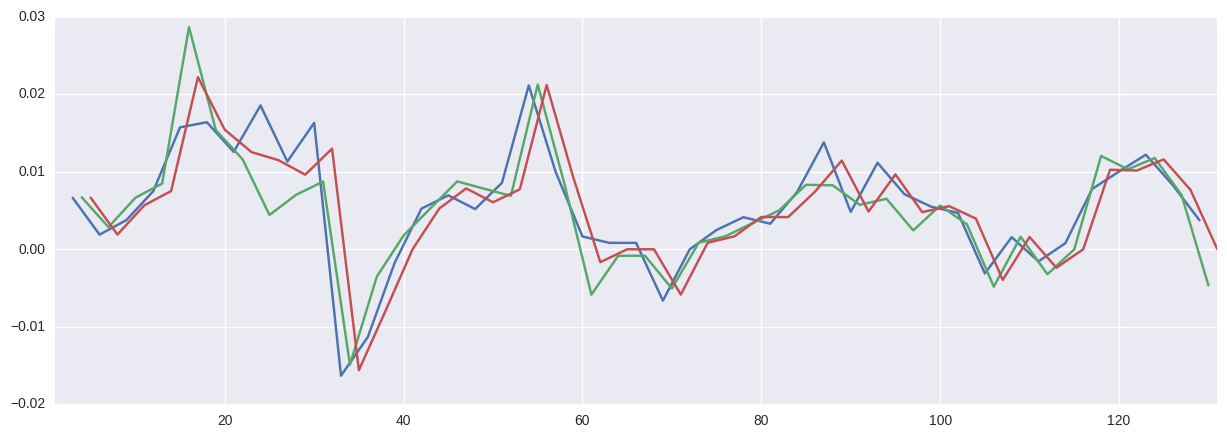

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize = (15, 5))

rural_return["General index"].plot(ax = ax1, label = "Rural")
urban_return["General index"].plot(ax = ax1, label = "Urban")
rural_urban_return["General index"].plot(ax = ax1, label = "Rural+Urban")

In [19]:
mean_rural_return = rural_return.mean()
std_rural_return = rural_return.std()

mean_urban_return = urban_return.mean()
std_urban_return = urban_return.std()

mean_rural_urban_return = rural_urban_return.mean()
std_rural_urban_return = rural_urban_return.std()